### <center>San Jose State University<br>Department of Applied Data Science<br><br>**DATA 200<br>Computational Programming for Data Analytics**<br><br>Spring 2023<br>Instructor: Ron Mak</center>

# Subclasses
#### Subclasses and inheritance are two of the most important topics of object-oriented programming.
#### A Python class can be the **base class** of one or more **subclasses**. A subclass **inherits** attributes and methods from the base class, also known as the **superclass**. Therefore, a superclass can contain the common attributes and methods that its subclasses can share.
#### A subclass can be the base class of other subclasses. We can represent an **inheritance hierarchy** of superclasses and subclasses as a tree, with the primary superclass at the top as the root of the tree. (Trees in computer science grow upside down.)
#### For example, the tree below shows that superclass `Shape` has subclasses `TwoDimensionalShape` and `ThreeDimensionalShape`. Class `TwoDimensionalShape` is itself the superclass of subclasses `Circle`, `Square`, and `Triangle`. Class `ThreeDimensionalShape` is itself the superclass of subclasses `Sphere`, `Cube`, and `Tetrahedron`.
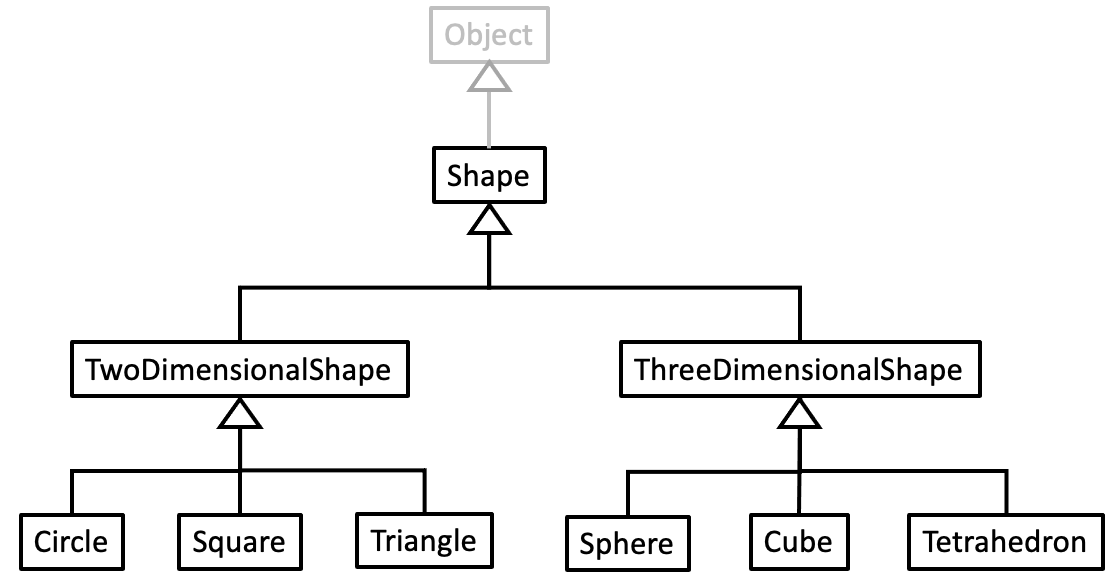
#### Implicitly, every class is directly or indirectly a subclass of the ultimate superclass `Object`.

## Testing Class `CommissionEmployee`  

In [2]:
from commissionemployee import CommissionEmployee
from decimal import Decimal

In [3]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', 
    Decimal('1s0_000.00'), Decimal('0.06'))
c

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: $10,000.00
commission rate: 0.06

In [4]:
print(f'{c.earnings():,.2f}')

600.00


In [5]:
c.gross_sales = Decimal('20_000.00')
c.commission_rate = Decimal('0.1')

In [6]:
print(f'{c.earnings():,.2f}')

2,000.00


## 10.8.2 Subclass `SalariedCommissionEmployee` 
#### Subclass `SalariedCommissionEmployee` inherits from its superclass `CommissionEmployee`. Computer scientists call this an ***is-a*** relationship -- a salaried commission employee is a commission employee.

### Method `__init__` and Built-In Function `super` 
#### The `__init__()` constructor of a subclass must initialize the attributes that it inherits from its superclass by using the built-in function `super()` to call the superclass's `__init__()` constructor:
``` Python
from commissionemployee import CommissionEmployee
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """
    An employee who gets paid a salary plus a commission.
    """
    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """
        Construct a SalariedCommissionEmployee object.
        @param first_name the employee's first name.
        @param last_name the employee's last name.
        @param ssn the employee's SSN.
        @param gross_sales the employee's gross sales..
        @param commission_rate the employee's commission rate.
        @param base_salary the employee's base salary.
        """
        # First initialize the base class object.
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)

        # Then the attributes of this subclass.
        self.base_salary = base_salary  # validate via property
```

### Overriding Method `earnings`
#### Because a salaried commissioned employee also earns a base salary, subclass `SalariedCommissionEmployee` **overrides** the `earnings()` method that it inherits from its superclass:
``` Python
    def earnings(self):
        """
        @return the employee's earnings.
        """
        return super().earnings() + self.base_salary
```
#### A salaried commissioned employee earns whatever a regular commissioned employee earns -- `super().earnings()` -- plus a base salary.

### Overriding Method `__repr__`
#### Method `__repr__()` of subclass `SalariedCommissionEmployee` overrides the method it inherits from its superclass:
``` Python
    def __repr__(self):
        """
        @return the string representation of an SalariedCommissionEmployee object.
        """
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: ${self.base_salary:,.2f}')
```
#### It will display whatever the superclass's method will display -- `super().__repr__()` -- but will prepend the string `'Salaried'` and include the salaried commissioned employee's base salary.

## Testing Class `SalariedCommissionEmployee` 

In [8]:
from salariedcommissionemployee import SalariedCommissionEmployee

In [9]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
         Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

print(s.first_name, s.last_name, s.ssn, s.gross_sales, 
       s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


In [10]:
print(f'${s.earnings():,.2f}')

$500.00


In [11]:
s.gross_sales = Decimal('10000.00')
s.commission_rate = Decimal('0.05')
s.base_salary = Decimal('1000.00')

print(s)

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: $10,000.00
commission rate: 0.05
base salary: $1,000.00


In [12]:
print(f'{s.earnings():,.2f}')

1,500.00


### Testing the “is a” Relationship 

In [13]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

In [14]:
isinstance(s, CommissionEmployee)

True

In [15]:
isinstance(s, SalariedCommissionEmployee)

True

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################


#### Additional material (C) Copyright 2023 by Ronald Mak